 Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Mount Google Drive to access the uploaded file (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset (update the path as per your file location)
file_path = '/content/drive/MyDrive/AB_NYC_2019.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Dataset Preview:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial Dataset Preview:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  

Check for Missing Data

In [2]:
# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Handle missing values
# Option 1: Drop columns with excessive missing values (e.g., 'last_review', 'reviews_per_month')
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

# Option 2: Fill missing numeric values with the median (if applicable)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values in Each Column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing Values After Handling:
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude               

Remove Duplicate Records

In [3]:
# Identify and remove duplicate rows
print("\nNumber of Duplicate Rows Before Removal:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print("Number of Duplicate Rows After Removal:", df.duplicated().sum())


Number of Duplicate Rows Before Removal: 0
Number of Duplicate Rows After Removal: 0


Standardize Data Formatting

In [4]:
# Convert categorical columns to consistent string formatting
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()

# Ensure numeric columns have consistent data types
df['price'] = df['price'].astype(float)
df['minimum_nights'] = df['minimum_nights'].astype(int)

# Preview standardized data
print("\nStandardized Data Preview:")
print(df.head())


Standardized Data Preview:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            brooklyn    kensington  40.64749  -73.97237   
1     Jennifer           manhattan       midtown  40.75362  -73.98377   
2    Elisabeth           manhattan        harlem  40.80902  -73.94190   
3  LisaRoxanne            brooklyn  clinton hill  40.68514  -73.95976   
4        Laura           manhattan   east harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     private room  149.0               1       

Detect and Handle Outliers

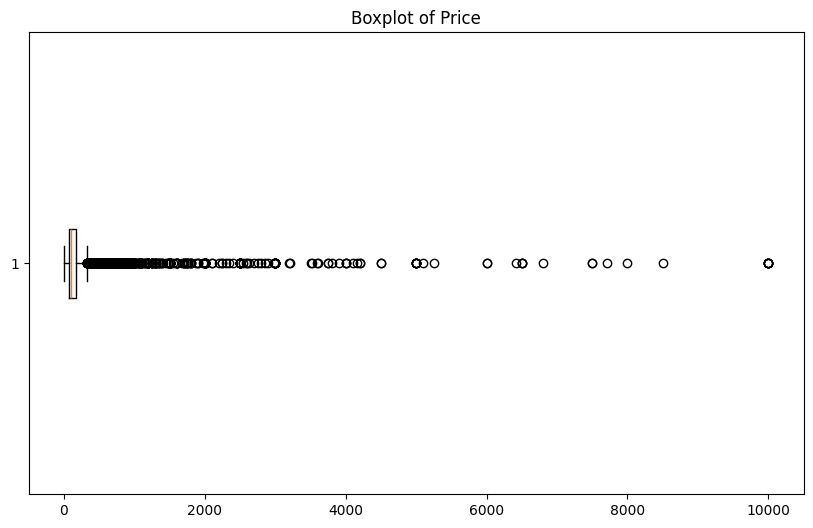


Shape Before Removing Outliers: (48895, 14)
Shape After Removing Outliers: (45923, 14)


In [5]:
# Visualize outliers using boxplots (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Price')
plt.show()

# Detect outliers using IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in the 'price' column
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Compare the shape before and after removing outliers
print("\nShape Before Removing Outliers:", df.shape)
print("Shape After Removing Outliers:", df_cleaned.shape)

Save the Cleaned Dataset

In [6]:
# Save the cleaned dataset to a new CSV file
output_path = '/content/drive/MyDrive/AB_NYC_2019_cleaned.csv'
df_cleaned.to_csv(output_path, index=False)

print("\nCleaned Dataset Saved Successfully!")


Cleaned Dataset Saved Successfully!
